# Use of the wflow OpenStreams framework API

This ipython notebook demonstrates how to load an openstreams python model and execute it step-by-step and investigate the (intermediate) results. The first steps is to load the model and framework:


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# First import the model. Here we use the HBV version
from wflow.wflow_sbm import *
import IPython
from IPython.display import display, clear_output

#clear_output = IPython.core.display.clear_output

## Set model run-time parameters

 Set the:
 
 - start and time time
 - set the runid (this is where the results are stored, relative to the casename)
 - set the name of the configfile (stire in the case directory
 - set the clone mape (usually the wflow_subcatch.map)
 - set the casename. This is where all the model the model resides



In [3]:
# define start and stop time of the run
startTime = 1
stopTime = 200
currentTime = 1
     
# set runid, cl;onemap and casename. Also define the ini file
runId = "memtest"
#configfile="wflow_hbv_mem.ini"
configfile="wflow_sbm.ini"
wflow_cloneMap = 'wflow_subcatch.map' 

# the casename points to the complete model setup with both static and dynamic input
caseName="../examples/wflow_rhine_sbm/"


In [4]:
#make a usermodel object     
myModel = WflowModel(wflow_cloneMap, caseName,runId,configfile)

# initialise the framework
dynModelFw = wf_DynamicFramework(myModel, stopTime,startTime)


In [5]:
dynModelFw.createRunId(NoOverWrite=False,level=logging.ERROR)
dynModelFw.setQuiet(1)
# Run the initial part of the model (reads parameters and sets initial values)
dynModelFw._runInitial() # Runs initial part

In [6]:
dynModelFw._runResume() # gets the state variables from disk
# Get list of variables supplied by the model
#print dynModelFw.wf_supplyVariableNamesAndRoles()

## Investigate a couple of model variables

<matplotlib.colorbar.Colorbar instance at 0x000000000EA75688>

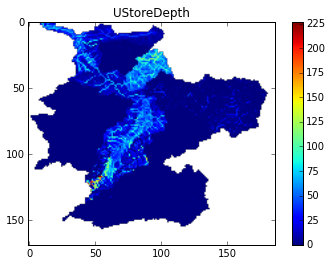

In [7]:
#
sm = dynModelFw.wf_supplyMapAsNumpy("UStoreDepth")
sm[sm == -999] = np.nan
uz = dynModelFw.wf_supplyMapAsNumpy("FirstZoneCapacity")
uz[uz == -999] = np.nan

imshow(sm)
title("UStoreDepth")
colorbar()


<matplotlib.colorbar.Colorbar instance at 0x000000000EFD2508>

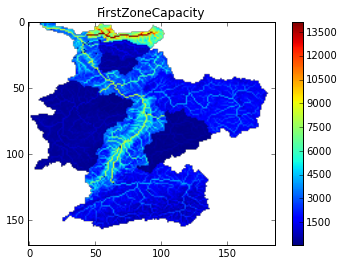

In [8]:
imshow(uz)
title("FirstZoneCapacity")
colorbar()

In [9]:
dynModelFw.wf_setValueLdd("TopoLdd",5.0,6.46823,51.6821)
npmap0 = dynModelFw.wf_supplyMapAsNumpy("TopoLdd")
ltt = dynModelFw.wf_supplyMapAsList("SurfaceRunoff")

c:\repos\wflow\wflow\wflow_lib.py:524: RuntimeWarning: invalid value encountered in absolute
  col_ =  numpy.absolute(diffx) <= (XX[0,0] * tolerance)  # cellsize
c:\repos\wflow\wflow\wflow_lib.py:524: RuntimeWarning: invalid value encountered in less_equal
  col_ =  numpy.absolute(diffx) <= (XX[0,0] * tolerance)  # cellsize
c:\repos\wflow\wflow\wflow_lib.py:525: RuntimeWarning: invalid value encountered in absolute
  row_ =  numpy.absolute(diffy) <= (XX[0,0] * tolerance)# cellsize
c:\repos\wflow\wflow\wflow_lib.py:525: RuntimeWarning: invalid value encountered in less_equal
  row_ =  numpy.absolute(diffy) <= (XX[0,0] * tolerance)# cellsize


## Run for a number of timesteps

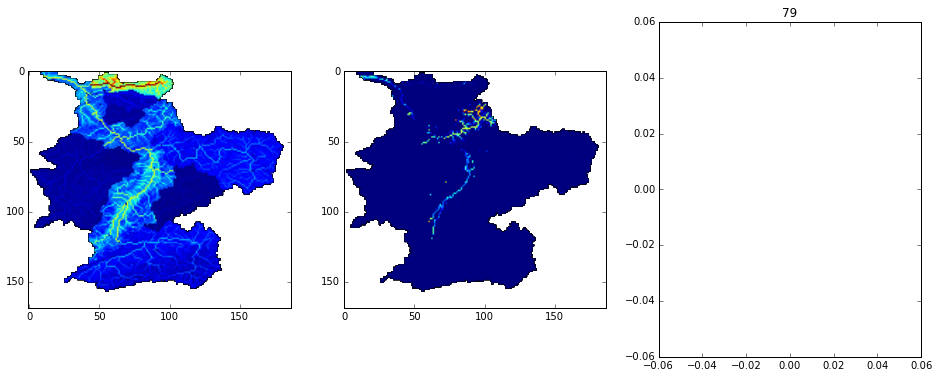

In [10]:
f, ax = plt.subplots(1,3,figsize=(16, 6))

plotar = []

for ts in range(20,80):
         # Get value at pit
      
        inflowQ = dynModelFw.wf_supplyScalar("SurfaceRunoff",5.68962,50.7307)
        plotar.append(inflowQ)   
        # Add inflow to outflow
        #dynModelFw.wf_setValue("ForecQ_qmec", -1.0 * inflowQ  ,6.46823,51.6821)
        Resoutflow = inflowQ
        dynModelFw.wf_setValues("PET",scalar(2.0))
        #dynModelFw.wf_setValue("ForecQ_qmec",inflowQ * 1000 ,6.47592,51.7288)
        # update runoff ONLY NEEDED IF YOU FIDDLE WITH THE KIN_WAVE RESERVOIR
        myModel.updateRunOff()
        dynModelFw._runDynamic(ts,ts) # runs for all timesteps
        #dynModelFw.wf_setValue("SurfaceRunoff",0.0,6.46823,51.6821)
        #dynModelFw.wf_setValue("SurfaceRunoff",0.0,6.11535,51.8425)
        npmap0 = dynModelFw.wf_supplyMapAsNumpy("ForecQ_qmec")
        npmap1 = dynModelFw.wf_supplyMapAsNumpy("P")
        run = dynModelFw.wf_supplyMapAsNumpy("SurfaceRunoff")
        uz = dynModelFw.wf_supplyMapAsNumpy("FirstZoneCapacity")
        sm = dynModelFw.wf_supplyMapAsNumpy("UStoreDepth")
        
        sm[sm == -999] = np.nan
        #dynModelFw.wf_setValues("UpperZoneStorage",uz * 10.1)
        uz[uz == -999] = np.nan
        run[run == -999] = np.nan
        ax[0].imshow(uz)
        ax[1].imshow(sm)
        #ax[2].imshow(log(run))
        ax[2].plot(plotar,'b')
        ax[2].set_title(str(ts))
        clear_output()
        display(f)
        
plt.close()

In [ ]:
dynModelFw._runSuspend() # saves the state variables
dynModelFw._wf_shutdown()

In [ ]:
run = dynModelFw.wf_supplyMapAsNumpy("SurfaceRunoff")
run[run == -999] = np.nan

In [ ]:
imshow(log(run))

In [11]:
plotar


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]